# Importing Library

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importing Data

In [5]:
data = pd.read_csv('olympics2024.csv')

In [6]:
data.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [9]:
data.isna().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


# Visualizing Data on Specific Criteria

In [35]:
cols=['Country','Total']
df_sorted=data.loc[:,cols].sort_values('Total', ascending=False).head(15)

In [17]:
df_sorted

,Country,Total
0,United States,126
1,China,91
6,Great Britain,65
4,France,64
3,Australia,53
2,Japan,45
8,Italy,40
5,Netherlands,34
9,Germany,33
7,South Korea,32


C:\Users\kunal\AppData\Local\Temp\ipykernel_25132\2607400564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total', data=df_sorted, ax=ax,palette='Set1')


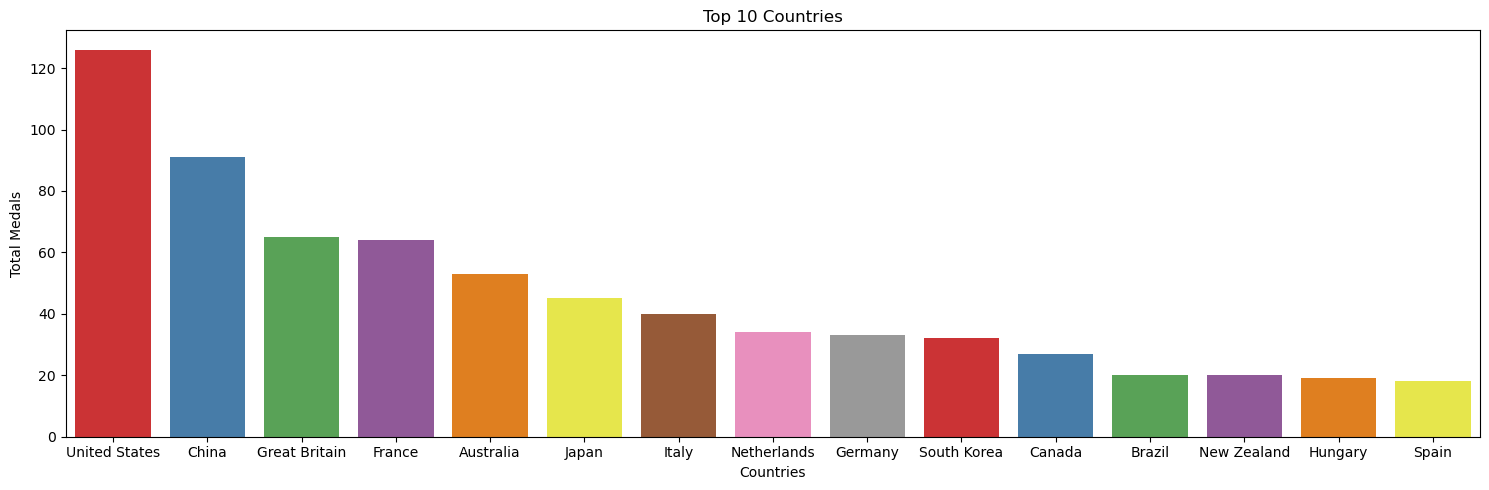

In [38]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Country', y='Total', data=df_sorted, ax=ax,palette='Set1')
ax.set_title('Top 10 Countries')
ax.set_xlabel('Countries')
ax.set_ylabel('Total Medals')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


In [40]:
df_gold=data[['Country','Gold']].groupby('Country').sum().sort_values('Gold', ascending=False).head(15)

In [41]:
df_gold

,Gold
Country,
China,40
United States,40
Japan,20
Australia,18
France,16
Netherlands,15
Great Britain,14
South Korea,13
Germany,12


C:\Users\kunal\AppData\Local\Temp\ipykernel_25132\1646420387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Gold', data=df_gold, ax=ax, palette='Set2')


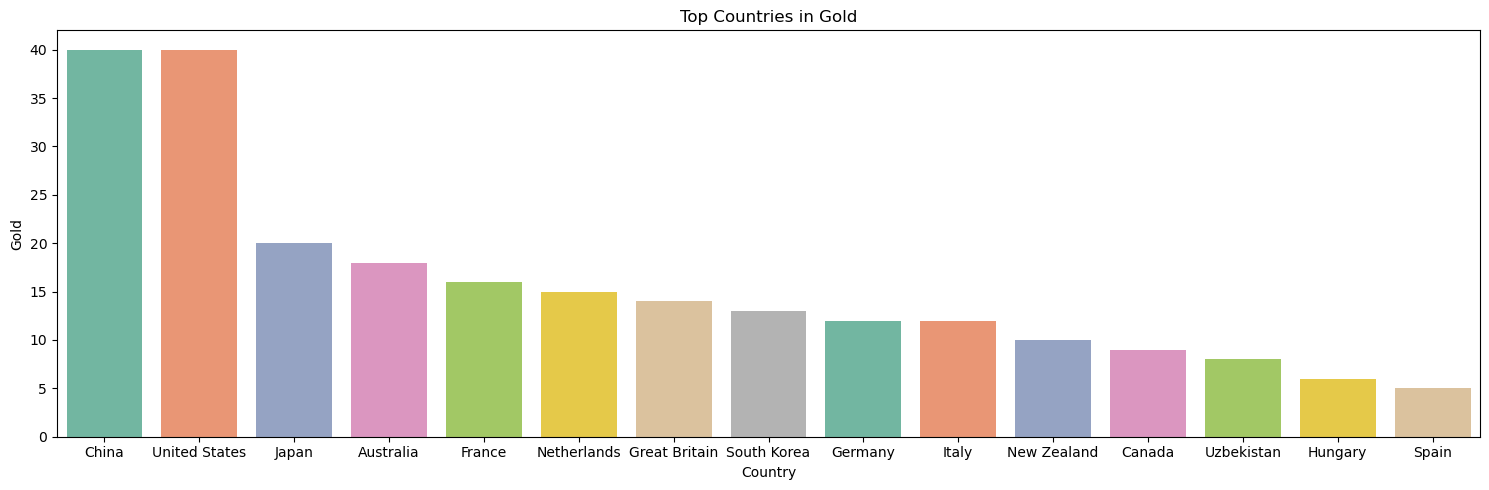

In [46]:
fid,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Country', y='Gold', data=df_gold, ax=ax, palette='Set2')
ax.set_title('Top Countries in Gold')
ax.set_xlabel('Country')
ax.set_ylabel('Gold')
ax.tick_params(axis='x',rotation =0)
plt.tight_layout()
plt.show()

In [47]:
df_silver=data[['Country','Silver']].groupby('Country').sum().sort_values('Silver', ascending=False).head(15)

C:\Users\kunal\AppData\Local\Temp\ipykernel_25132\265133311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country',y='Silver', data=df_silver, ax=ax , palette='Set3')


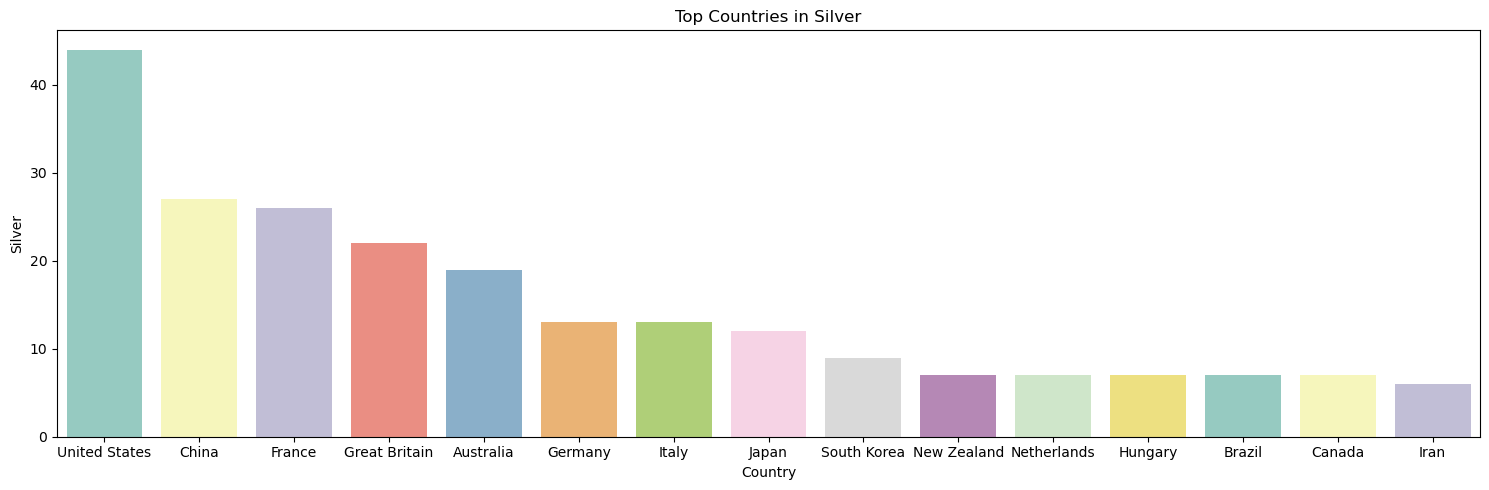

In [54]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Country',y='Silver', data=df_silver, ax=ax , palette='Set3')
ax.set_title('Top Countries in Silver')
ax.set_xlabel('Country')
ax.set_ylabel('Silver')
ax.tick_params(axis='x',rotation =0)
plt.tight_layout()
plt.show()

# Finding Relations inside the data with the PairPlot

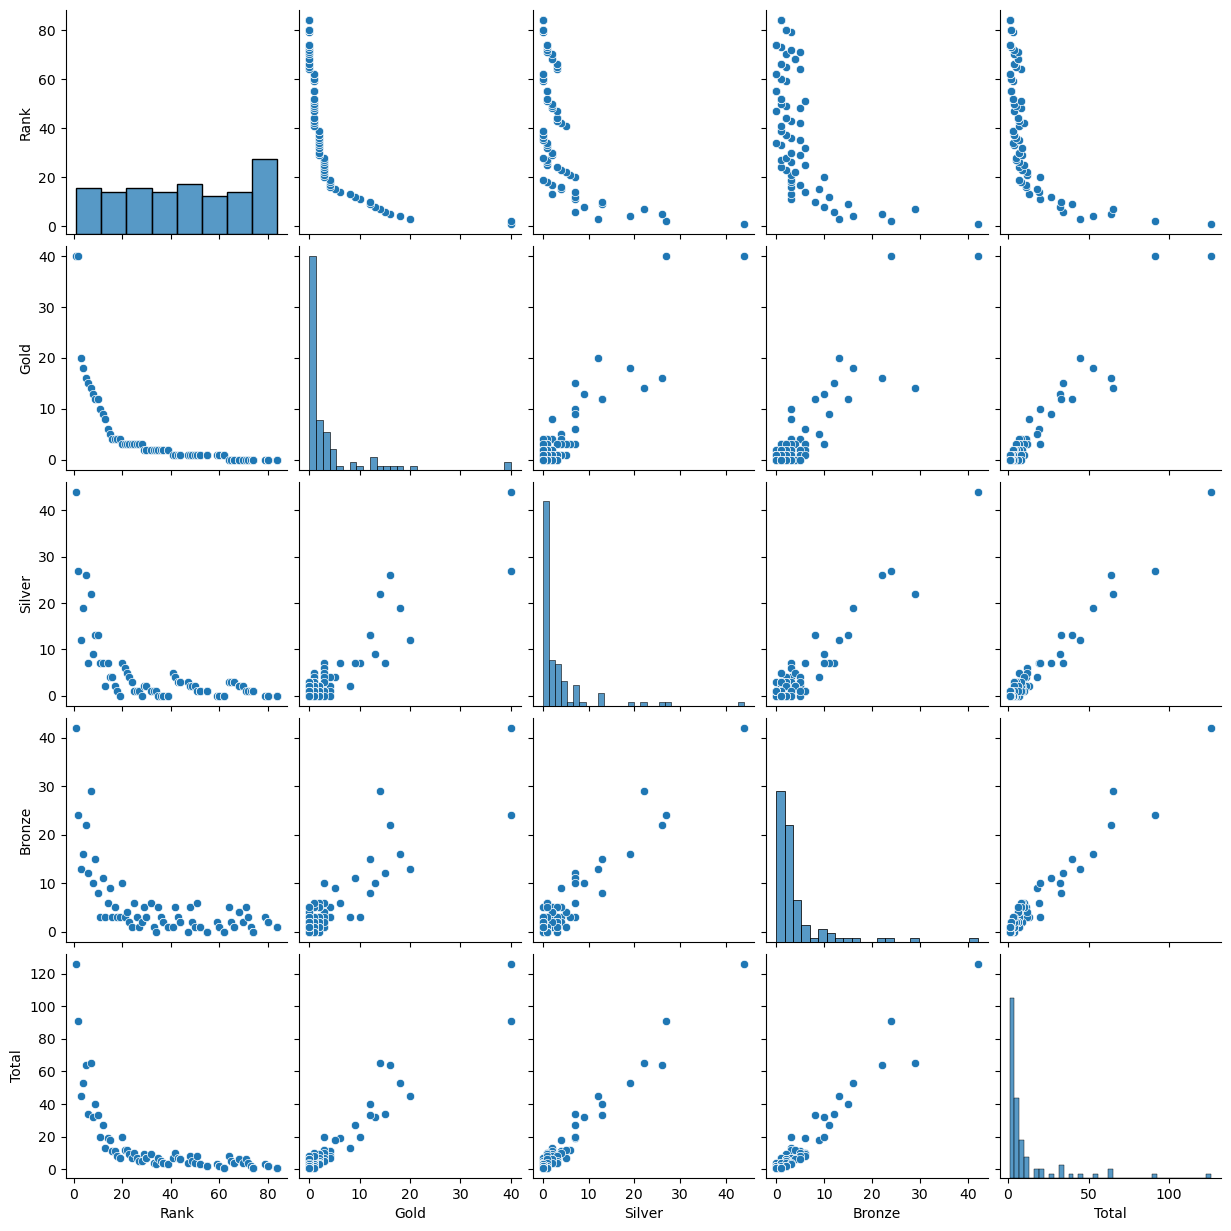

In [56]:
sns.pairplot(data)

# Using K Means CLusters, Clustering the Data into different Clusters.

In [74]:
# Select relevant columns for clustering
columns_to_cluster = ['Gold', 'Silver', 'Bronze', 'Total']
df_cluster = data[columns_to_cluster]
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_cluster)

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

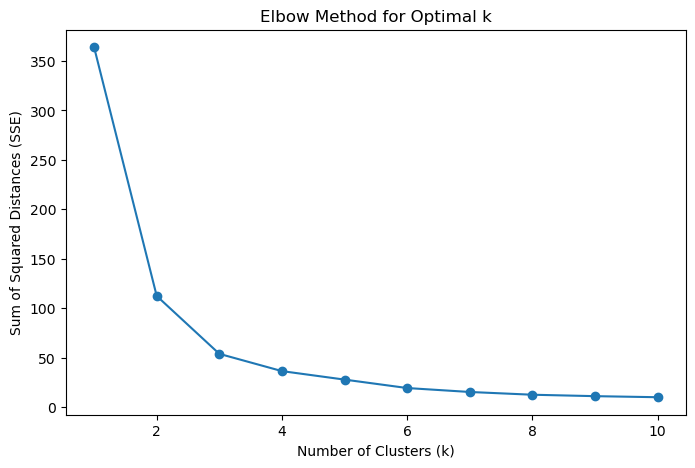

In [75]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using 3 Folds as the Elbow Method suggested 

In [76]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


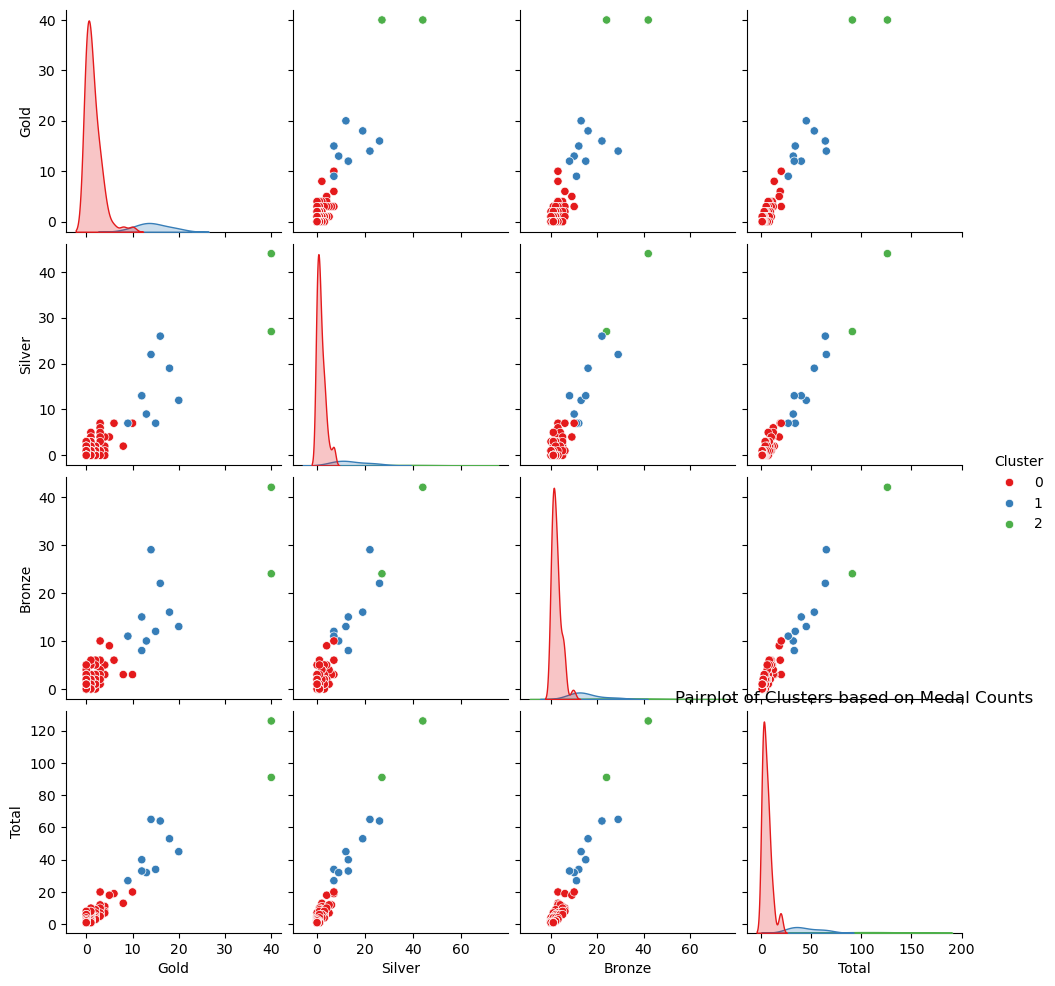

In [79]:
sns.pairplot(data, hue='Cluster', vars=columns_to_cluster, palette='Set1')
plt.title('Pairplot of Clusters based on Medal Counts')
plt.show()

# Cluster 2 is the Highest , 1 is Average and 0 is Performing below Average.

In [81]:
for cluster_number in sorted(data['Cluster'].unique()):
    print(f"\nCountries in Cluster {cluster_number}:")
    cluster_countries = data[data['Cluster'] == cluster_number]['Country'].tolist()
    print(cluster_countries)


Countries in Cluster 0:
['New Zealand', 'Uzbekistan', 'Hungary', 'Spain', 'Sweden', 'Kenya', 'Norway', 'Ireland', 'Brazil', 'Iran', 'Ukraine', 'Romania', 'Georgia', 'Belgium', 'Bulgaria', 'Serbia', 'Czech Republic', 'Denmark', 'Azerbaijan', 'Croatia', 'Cuba', 'Bahrain', 'Slovenia', 'Chinese Taipei', 'Austria', 'Hong Kong', 'Philippines', 'Algeria', 'Indonesia', 'Israel', 'Poland', 'Kazakhstan', 'Jamaica', 'South Africa', 'Thailand', 'Ethiopia', 'Switzerland', 'Ecuador', 'Portugal', 'Greece', 'Argentina', 'Egypt', 'Tunisia', 'Botswana', 'Chile', 'St Lucia', 'Uganda', 'Dominican Republic', 'Guatemala', 'Morocco', 'Dominica', 'Pakistan', 'Turkey', 'Mexico', 'Armenia', 'Colombia', 'North Korea', 'Kyrgyzstan', 'Lithuania', 'India', 'Moldova', 'Kosovo', 'Cyprus', 'Fiji', 'Jordan', 'Mongolia', 'Panama', 'Tajikistan', 'Albania', 'Grenada', 'Malaysia', 'Puerto Rico', 'Cape Verde', 'Ivory Coast', 'Refugee Olympic Team', 'Peru', 'Qatar', 'Singapore', 'Slovakia', 'Zambia']

Countries in Cluster 1